### Check whether the model code changes had significant impact

Changes: removed bioavailable fraction code for atmospheric Mn and fixed units of the Mn burial rate.

Tested for 1 year run.

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from datetime import date

%matplotlib notebook

In [3]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize, jsize = imax-imin, jmax-jmin

Runs:
- ancient --- continental river dMn too high; has SPM
- old --- continental river dMn fixed; has SPM;
- new --- same as old but with atmospheric deposition and burial rate fixed.

In [4]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]

In [5]:
ancient = nc.Dataset('/data/brogalla/run_storage/Mn-set5-202008/spin-up0/ANHA12_EXH006_2002_monthly.nc')
old     = nc.Dataset('/data/brogalla/run_storage/spin-up0-original/ANHA12_EXH006_2002_monthly.nc')
new     = nc.Dataset('/data/brogalla/run_storage/spin-up0/ANHA12_EXH006_2002_monthly.nc')

In [20]:
dmn_ancient = np.ma.masked_where((tmask < 0.1), np.array(ancient.variables['dissolmn'])[8,0,:,:,:])
dmn_old = np.ma.masked_where((tmask < 0.1), np.array(old.variables['dissolmn'])[8,0,:,:,:])
dmn_new = np.ma.masked_where((tmask < 0.1), np.array(new.variables['dissolmn'])[8,0,:,:,:])

lons  = np.array(new.variables['nav_lon'])
lats  = np.array(new.variables['nav_lat'])

In [21]:
print('New minus old run ------------')
dmn_diff = dmn_new - dmn_old
dmn_diff[dmn_diff < 0] = np.nan
print('Maximum difference: ', np.nanmax(dmn_diff)*1e9, 'nM')
print('Minimum difference:', np.nanmin(dmn_diff)*1e9, 'nM')
print('Average difference:', np.nanmean(dmn_diff)*1e9, 'nM')

New minus old run ------------
Maximum difference:  0.04492750615980867 nM
Minimum difference: 0.0 nM
Average difference: 0.0002716689178304532 nM


In [24]:
print('New minus ancient run ------------')
dmn_diff = dmn_new - dmn_ancient
dmn_diff[dmn_diff < 0] = np.nan
print('Maximum difference: ', np.nanmax(dmn_diff)*1e9, 'nM')
print('Minimum difference:', np.nanmin(dmn_diff)*1e9, 'nM')
print('Average difference:', np.nanmean(dmn_diff)*1e9, 'nM')

New minus ancient run ------------
Maximum difference:  0.04492750615980867 nM
Minimum difference: 0.0 nM
Average difference: 0.00027136084178314146 nM


In [23]:
print('Old minus ancient run ------------')
dmn_diff = dmn_old - dmn_ancient
dmn_diff[dmn_diff < 0] = np.nan
print('Maximum difference: ', np.nanmax(dmn_diff)*1e9, 'nM')
print('Minimum difference:', np.nanmin(dmn_diff)*1e9, 'nM')
print('Average difference:', np.nanmean(dmn_diff)*1e9, 'nM')

Old minus ancient run ------------
Maximum difference:  0.000854538662053983 nM
Minimum difference: 0.0 nM
Average difference: 1.6904483028176613e-08 nM


<IPython.core.display.Javascript object>


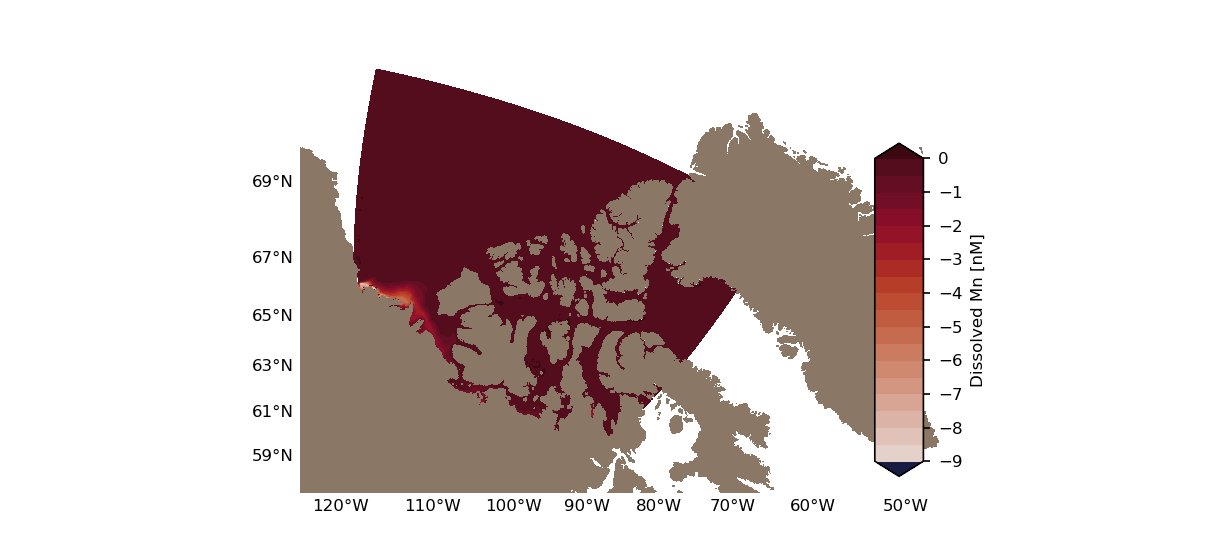

In [31]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

x, y = proj1(lons, lats)
contour = proj1.contourf(x, y, (dmn_old[0,:,:]-dmn_ancient[0,:,:])*1e9, levels=20, cmap=cmocean.cm.balance, \
                         vmin=-20, vmax=0.5, extend='both')

cbar_ax = fig.add_axes([0.72, 0.14, 0.04, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)#, ticks=np.linspace(-2,2,0.5))
cbar.set_label('Dissolved Mn [nM]', fontsize=8) 
cbar_ax.tick_params(axis='both', which='major', labelsize=8)
    
figure = plt.gcf()
figure.set_size_inches(4.5*1.8, 3.7)

<IPython.core.display.Javascript object>


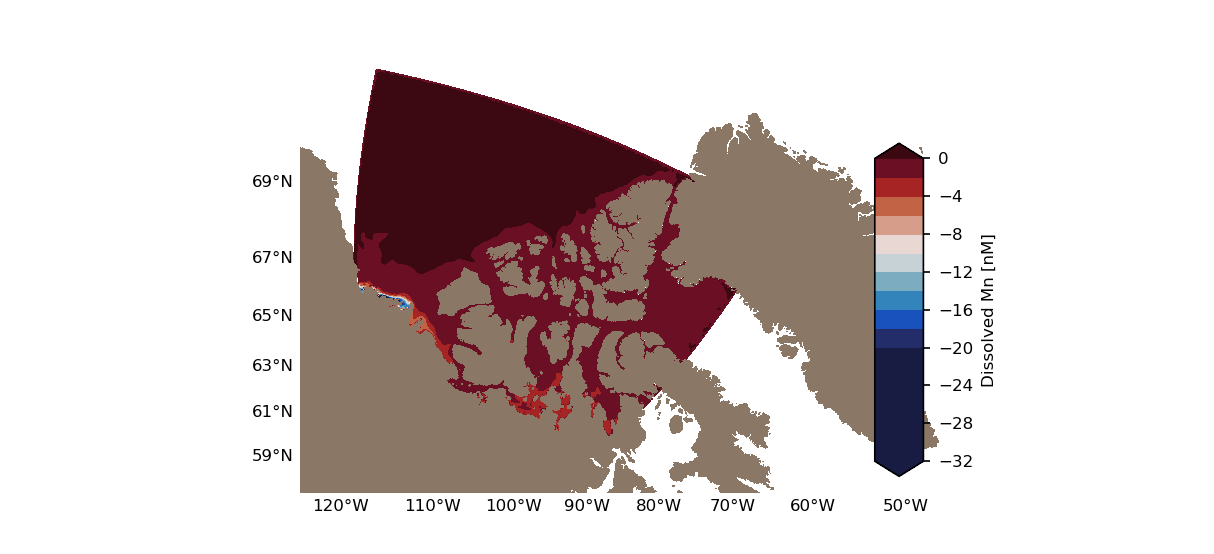

In [29]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

x, y = proj1(lons, lats)
contour = proj1.contourf(x, y, (dmn_new[0,:,:]-dmn_old[0,:,:])*1e9, levels=20, cmap=cmocean.cm.balance, \
                         vmin=-20, vmax=0.5, extend='both')

cbar_ax = fig.add_axes([0.72, 0.14, 0.04, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)#, ticks=np.linspace(-2,2,0.5))
cbar.set_label('Dissolved Mn [nM]', fontsize=8) 
cbar_ax.tick_params(axis='both', which='major', labelsize=8)
    
figure = plt.gcf()
figure.set_size_inches(4.5*1.8, 3.7)

<IPython.core.display.Javascript object>


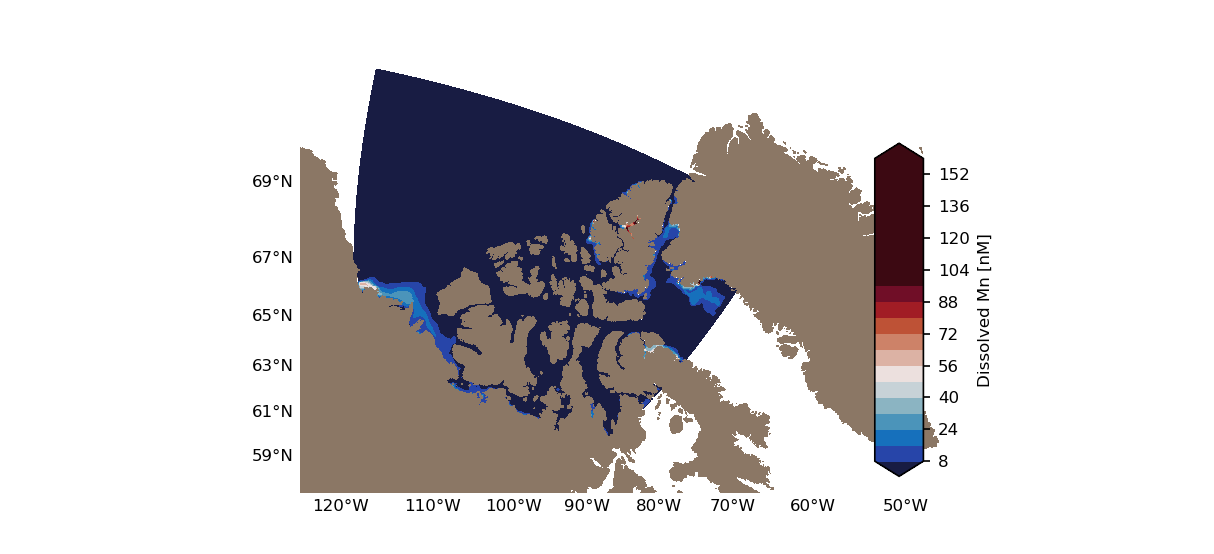

In [15]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

x, y = proj1(lons, lats)
contour = proj1.contourf(x, y, (dmn_new[0,:,:])*1e9, levels=20, cmap=cmocean.cm.balance, \
                         vmin=0, vmax=100, extend='both')

cbar_ax = fig.add_axes([0.72, 0.14, 0.04, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)#, ticks=np.linspace(-2,2,0.5))
cbar.set_label('Dissolved Mn [nM]', fontsize=8) 
cbar_ax.tick_params(axis='both', which='major', labelsize=8)
    
figure = plt.gcf()
figure.set_size_inches(4.5*1.8, 3.7)

<IPython.core.display.Javascript object>


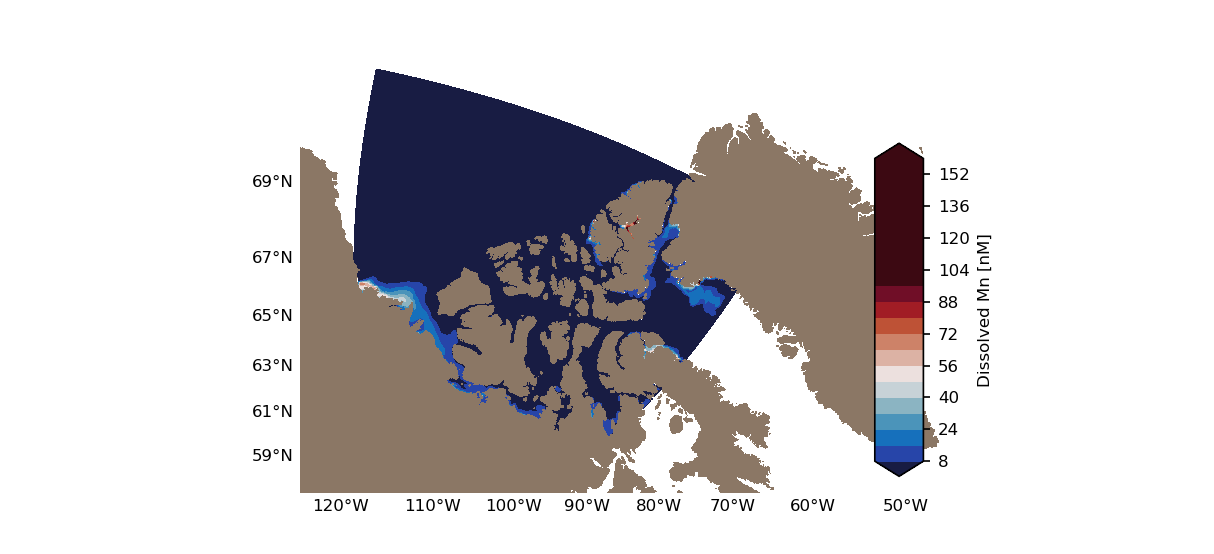

In [16]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

x, y = proj1(lons, lats)
contour = proj1.contourf(x, y, (dmn_old[0,:,:])*1e9, levels=20, cmap=cmocean.cm.balance, \
                         vmin=0, vmax=100, extend='both')

cbar_ax = fig.add_axes([0.72, 0.14, 0.04, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)#, ticks=np.linspace(-2,2,0.5))
cbar.set_label('Dissolved Mn [nM]', fontsize=8) 
cbar_ax.tick_params(axis='both', which='major', labelsize=8)
    
figure = plt.gcf()
figure.set_size_inches(4.5*1.8, 3.7)

<IPython.core.display.Javascript object>


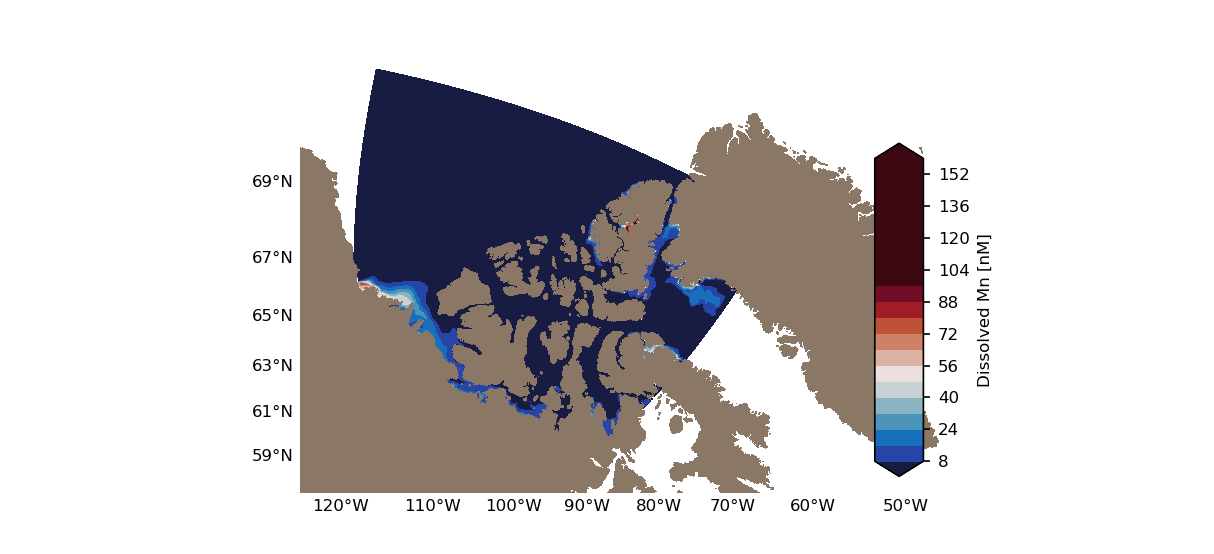

In [17]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

x, y = proj1(lons, lats)
contour = proj1.contourf(x, y, (dmn_ancient[0,:,:])*1e9, levels=20, cmap=cmocean.cm.balance, \
                         vmin=0, vmax=100, extend='both')

cbar_ax = fig.add_axes([0.72, 0.14, 0.04, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)#, ticks=np.linspace(-2,2,0.5))
cbar.set_label('Dissolved Mn [nM]', fontsize=8) 
cbar_ax.tick_params(axis='both', which='major', labelsize=8)
    
figure = plt.gcf()
figure.set_size_inches(4.5*1.8, 3.7)